In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

Number of bars (patches): 20
Number of patches in bar_plot: 20
Number of bar_plot.patches: 25
Number of plot_df rows: 20
Error bars may not be correctly assigned.


/tmp/ipykernel_3013034/1592877961.py:81: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(


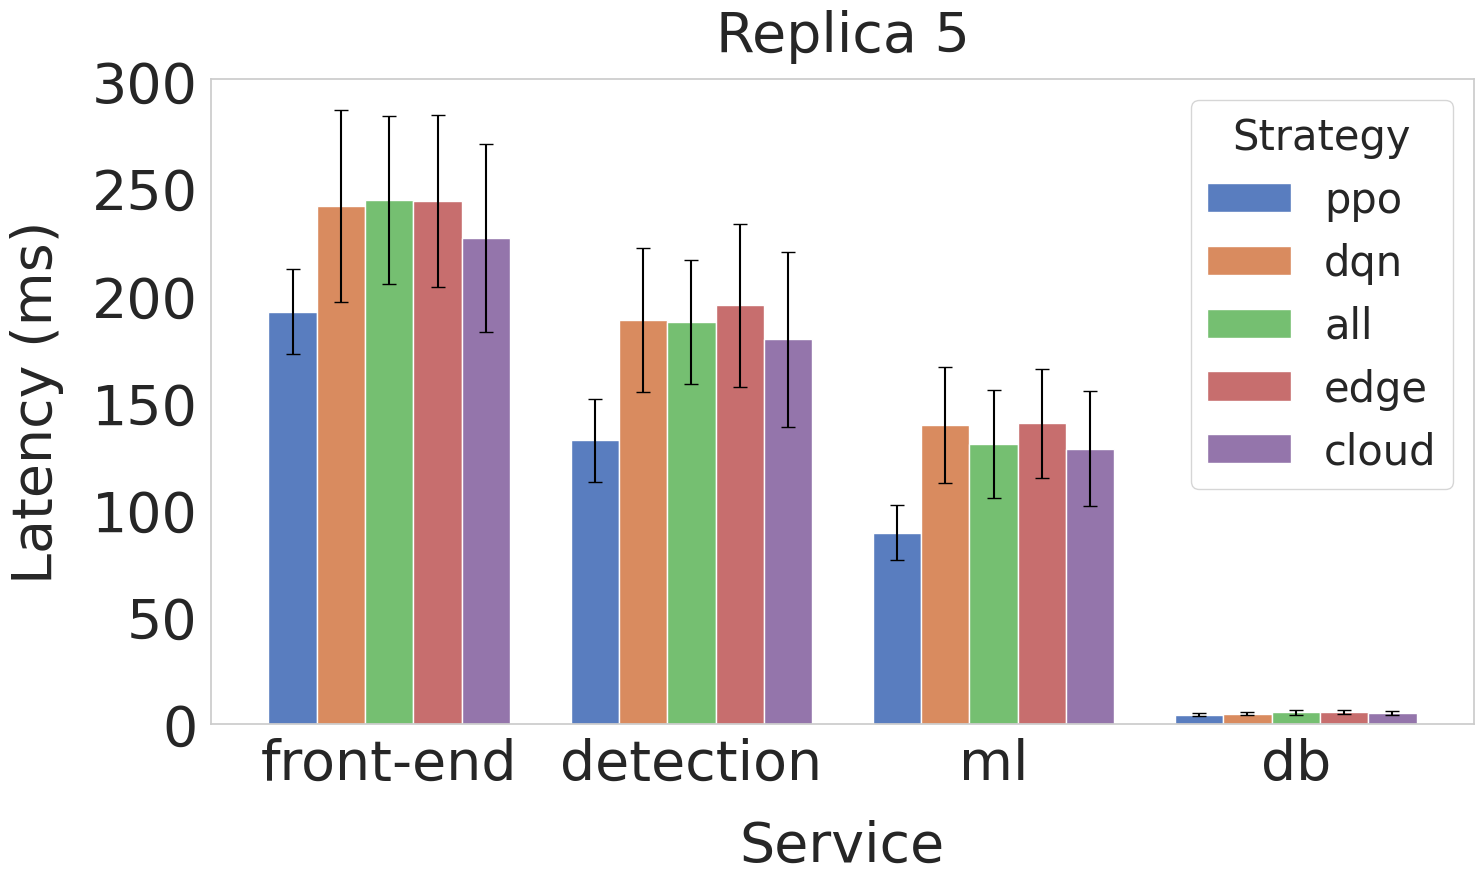

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

# Define the path variables
rl_path = './results/complete/rl'
be_path = './results/complete/be'

# Function to load and process RL data
def load_rl_data(pattern, strategy, replica):
    filename = f"{pattern}_{strategy}_replica{replica}.csv"
    file_path = os.path.join(rl_path, filename)
    df = pd.read_csv(file_path)
    # Extract relevant columns and calculate mean and standard deviation
    df['front-end'] = df['end_aggregator_latency']
    df['detection'] = df['end_detection_latency']
    df['ml'] = df['end_ml_latency']
    df['db'] = df['end_db_latency']
    mean = df[['front-end', 'detection', 'ml', 'db']].mean()
    std = df[['front-end', 'detection', 'ml', 'db']].std()
    return mean, std

# Function to load and process BE data
def load_be_data(pattern, strategy, replica):
    filename = f"{pattern}_{strategy}_replica{replica}.csv"
    file_path = os.path.join(be_path, filename)
    df = pd.read_csv(file_path)
    df['front-end'] = df['aggregator_latency']
    df['detection'] = df['detection_latency']
    df['ml'] = df['ml_latency']
    df['db'] = df['db_latency']
    mean = df[['front-end', 'detection', 'ml', 'db']].mean()
    std = df[['front-end', 'detection', 'ml', 'db']].std()
    return mean, std

# Function to compare and plot latency
def compare_and_plot_latency(pattern, replica, output_path=None):
    # Define strategies
    rl_strategies = ['ppo', 'dqn']
    be_strategies = ['all', 'edge', 'cloud']
    
    # Create a list to store data for plotting
    data = []
    
    # Load RL data
    for rl_strategy in rl_strategies:
        rl_mean, rl_std = load_rl_data(pattern, rl_strategy, replica)
        for service in rl_mean.index:
            data.append({
                'service': service, 
                'latency': rl_mean[service], 
                'std': rl_std[service],
                'strategy': rl_strategy
            })
    
    # Load BE data
    for be_strategy in be_strategies:
        be_mean, be_std = load_be_data(pattern, be_strategy, replica)
        for service in be_mean.index:
            data.append({
                'service': service, 
                'latency': be_mean[service], 
                'std': be_std[service],
                'strategy': be_strategy
            })
    
    # Convert the data to a DataFrame
    plot_df = pd.DataFrame(data)
    
    # Debugging: Print lengths to ensure they match
    print(f"Number of bars (patches): {len(plot_df)}")
    print(f"Number of patches in bar_plot: {len(plot_df)}")  # Temporarily, will adjust below
    
    # Set the plot style
    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 9))
    
    # Create the bar plot without error bars
    bar_plot = sns.barplot(
        x='service', 
        y='latency', 
        hue='strategy', 
        data=plot_df, 
        ci=None,   # Disable automatic confidence interval
        palette="muted"
    )
    
    # Verify the number of patches matches the plot_df
    num_patches = len(bar_plot.patches)
    num_data = len(plot_df)
    print(f"Number of bar_plot.patches: {num_patches}")
    print(f"Number of plot_df rows: {num_data}")
    
    if num_patches != num_data:
        print("Warning: The number of patches does not match the number of data points.")
        print("Error bars may not be correctly assigned.")
    
    # Iterate through each bar and add error bars using zip to avoid IndexError
    for patch, std in zip(bar_plot.patches, plot_df['std']):
        # Calculate the center of each bar
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()
        # Add error bar
        plt.errorbar(x, y, yerr=std, fmt='none', c='black', capsize=5, linewidth=1.5)
    
    # Set titles and labels with padding
    plt.title(f'Replica {replica}', fontsize=40, pad=20)
    plt.xlabel('Service', fontsize=40, labelpad=20)
    plt.ylabel('Latency (ms)', fontsize=40, labelpad=20)
    plt.legend(title='Strategy', fontsize=30, title_fontsize=30)
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)
    plt.grid(False)
    plt.tight_layout()
    if output_path:
        plt.savefig(output_path)
        print(f"图片已保存到: {output_path}")
    else:
        plt.show()

compare_and_plot_latency('chain', 5)


/tmp/ipykernel_3013034/886925592.py:88: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_3013034/886925592.py:88: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_3013034/886925592.py:88: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(


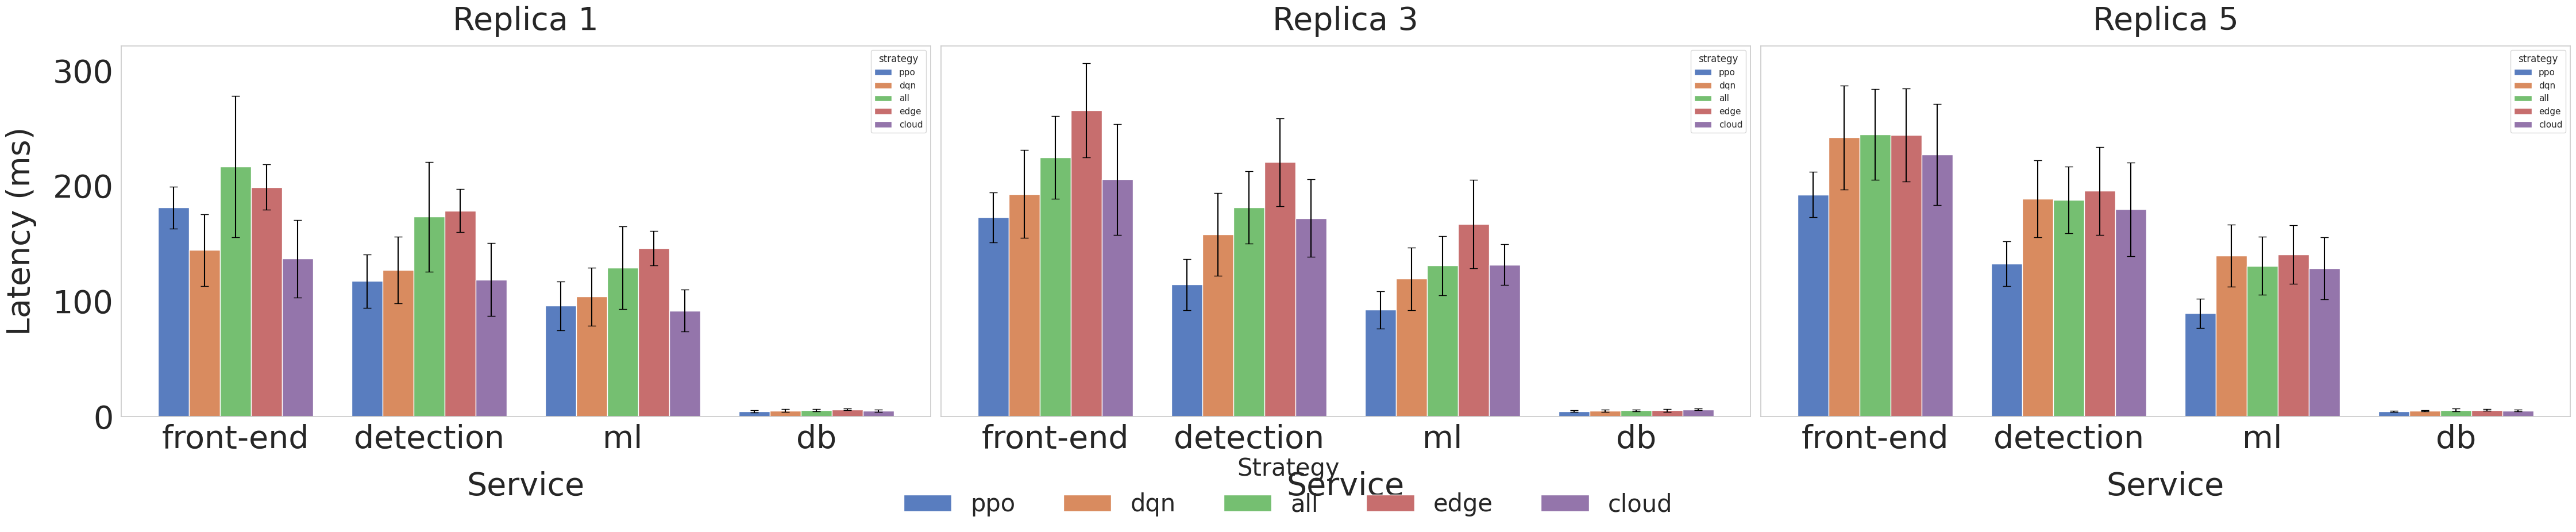

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

# Define the path variables
rl_path = './results/complete/rl'
be_path = './results/complete/be'

# Function to load and process RL data
def load_rl_data(pattern, strategy, replica):
    filename = f"{pattern}_{strategy}_replica{replica}.csv"
    file_path = os.path.join(rl_path, filename)
    df = pd.read_csv(file_path)
    # Extract relevant columns and calculate mean and standard deviation
    df['end-to-end']
    df['front-end'] = df['end_aggregator_latency']
    df['detection'] = df['end_detection_latency']
    df['ml'] = df['end_ml_latency']
    df['db'] = df['end_db_latency']
    mean = df[['front-end', 'detection', 'ml', 'db']].mean()
    std = df[['front-end', 'detection', 'ml', 'db']].std()
    return mean, std

# Function to load and process BE data
def load_be_data(pattern, strategy, replica):
    filename = f"{pattern}_{strategy}_replica{replica}.csv"
    file_path = os.path.join(be_path, filename)
    df = pd.read_csv(file_path)
    df['front-end'] = df['aggregator_latency']
    df['detection'] = df['detection_latency']
    df['ml'] = df['ml_latency']
    df['db'] = df['db_latency']
    mean = df[['front-end', 'detection', 'ml', 'db']].mean()
    std = df[['front-end', 'detection', 'ml', 'db']].std()
    return mean, std

# Function to compare and plot latency
def compare_and_plot_latency(pattern, replicas, output_path=None):
    # Define strategies
    rl_strategies = ['ppo', 'dqn']
    be_strategies = ['all', 'edge', 'cloud']
    
    # Create a list to store data for plotting
    data = []
    
    # Load data for each replica
    for replica in replicas:
        # Load RL data
        for rl_strategy in rl_strategies:
            rl_mean, rl_std = load_rl_data(pattern, rl_strategy, replica)
            for service in rl_mean.index:
                data.append({
                    'service': service, 
                    'latency': rl_mean[service], 
                    'std': rl_std[service],
                    'strategy': rl_strategy,
                    'replica': replica
                })
        
        # Load BE data
        for be_strategy in be_strategies:
            be_mean, be_std = load_be_data(pattern, be_strategy, replica)
            for service in be_mean.index:
                data.append({
                    'service': service, 
                    'latency': be_mean[service], 
                    'std': be_std[service],
                    'strategy': be_strategy,
                    'replica': replica
                })
    
    # Convert the data to a DataFrame
    plot_df = pd.DataFrame(data)
    
    # Set the plot style
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1, len(replicas), figsize=(15 * len(replicas), 9), sharey=True)
    
    if len(replicas) == 1:
        axes = [axes]
    
    for ax, replica in zip(axes, replicas):
        # Filter data for the current replica
        replica_df = plot_df[plot_df['replica'] == replica]
        
        # Create the bar plot without error bars
        bar_plot = sns.barplot(
            x='service', 
            y='latency', 
            hue='strategy', 
            data=replica_df, 
            ci=None,   # Disable automatic confidence interval
            palette="muted",
            ax=ax
        )
        
        # Iterate through each bar and add error bars using zip to avoid IndexError
        for patch, std in zip(bar_plot.patches, replica_df['std']):
            # Calculate the center of each bar
            x = patch.get_x() + patch.get_width() / 2
            y = patch.get_height()
            # Add error bar
            ax.errorbar(x, y, yerr=std, fmt='none', c='black', capsize=5, linewidth=1.5)
        
        # Set titles and labels with padding
        ax.set_title(f'Replica {replica}', fontsize=40, pad=20)
        ax.set_xlabel('Service', fontsize=40, labelpad=20)
        ax.set_ylabel('Latency (ms)', fontsize=40, labelpad=20)
        ax.tick_params(axis='x', labelsize=40)
        ax.tick_params(axis='y', labelsize=40)
        ax.grid(False)
    # Set the legend at the bottom with padding
    handles, labels = axes[-1].get_legend_handles_labels()
    fig.legend(handles, labels, title='Strategy', fontsize=30, title_fontsize=30, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=len(handles), frameon=False)
    
    plt.tight_layout()
    if output_path:
        plt.savefig(output_path)
        print(f"图片已保存到: {output_path}")
    else:
        plt.show()

compare_and_plot_latency('chain', [1, 3, 5])


/tmp/ipykernel_3013034/3005131057.py:89: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipykernel_3013034/3005131057.py:89: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipykernel_3013034/3005131057.py:89: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipykernel_3013034/3005131057.py:89: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


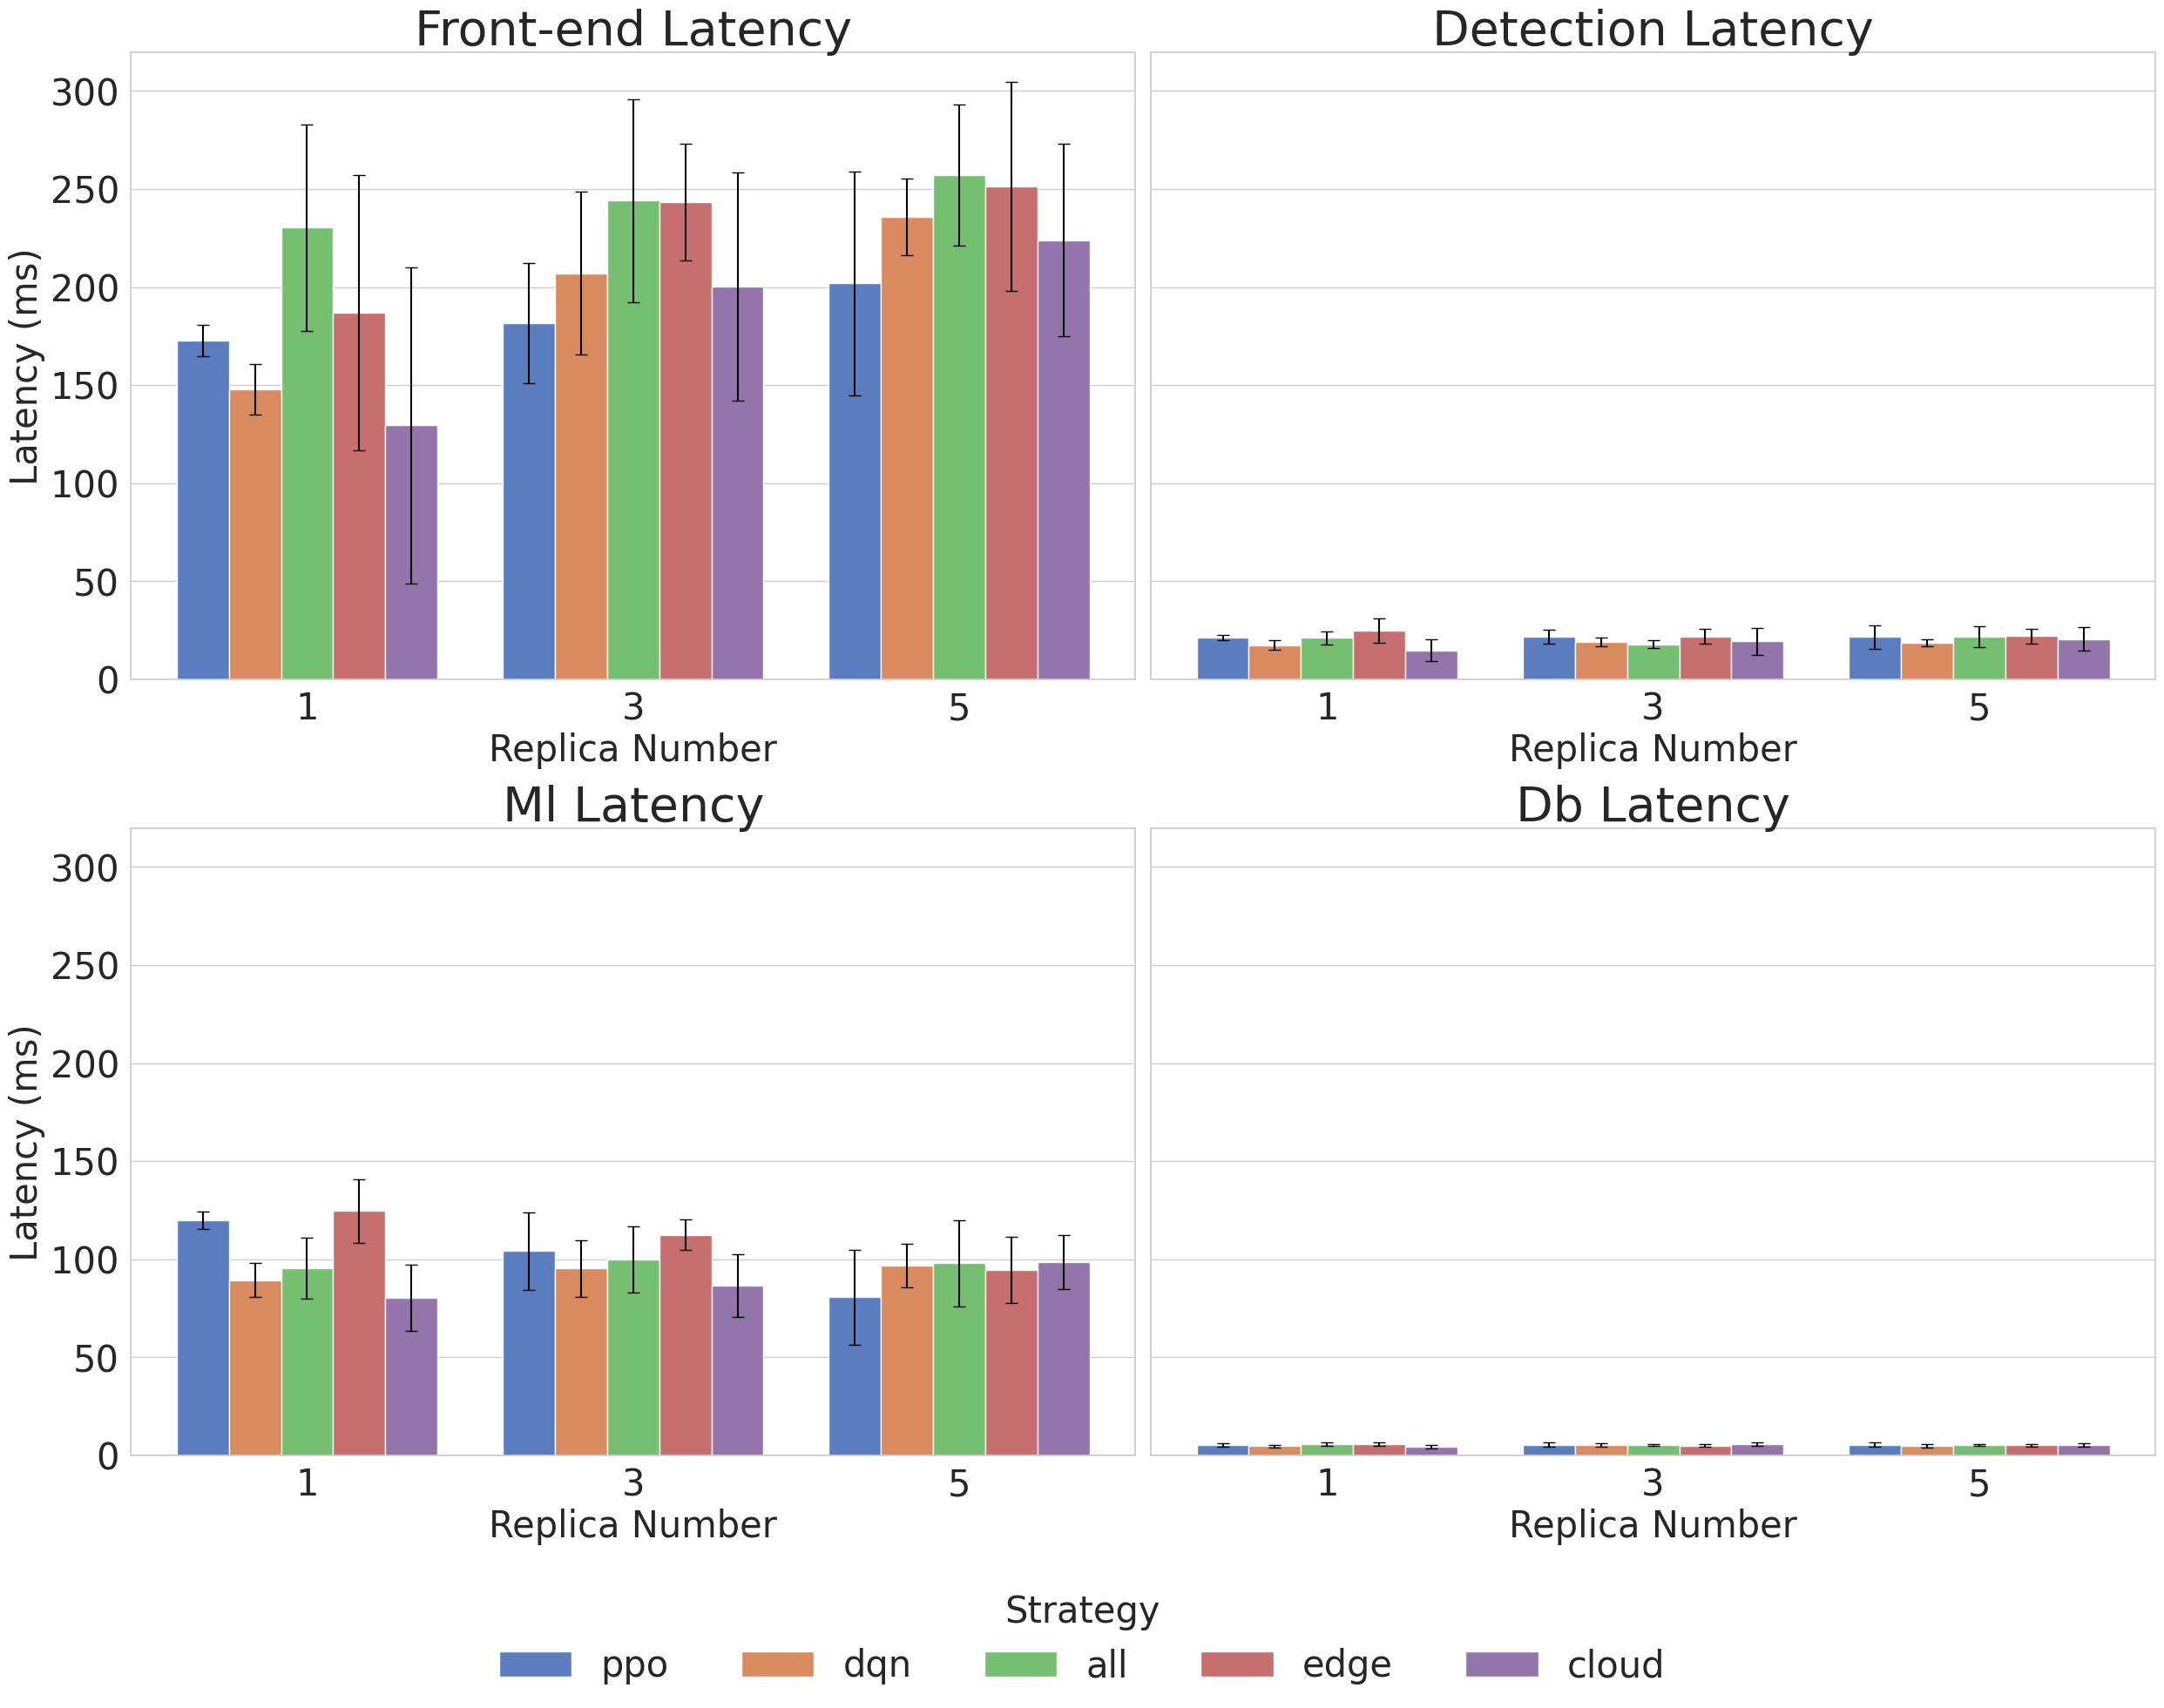

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Define the path variables
rl_path = './results/complete/rl'
be_path = './results/complete/be'

# Function to load and process RL data
def load_rl_data(pattern, strategy, replica):
    filename = f"{pattern}_{strategy}_replica{replica}.csv"
    file_path = os.path.join(rl_path, filename)
    df = pd.read_csv(file_path)
    # Extract relevant columns and calculate mean and standard deviation
    df['front-end'] = df['end_aggregator_latency']
    df['detection'] = df['end_detection_latency']
    df['ml'] = df['end_ml_latency']
    df['db'] = df['end_db_latency']
    mean = df[['front-end', 'detection', 'ml', 'db']].mean()
    std = df[['front-end', 'detection', 'ml', 'db']].std()
    return mean, std

# Function to load and process BE data
def load_be_data(pattern, strategy, replica):
    filename = f"{pattern}_{strategy}_replica{replica}.csv"
    file_path = os.path.join(be_path, filename)
    df = pd.read_csv(file_path)
    df['front-end'] = df['aggregator_latency']
    df['detection'] = df['detection_latency']
    df['ml'] = df['ml_latency']
    df['db'] = df['db_latency']
    mean = df[['front-end', 'detection', 'ml', 'db']].mean()
    std = df[['front-end', 'detection', 'ml', 'db']].std()
    return mean, std

# Function to compare and plot latency
def compare_and_plot_latency(pattern, replicas, output_path=None):
    # Define strategies
    rl_strategies = ['ppo', 'dqn']
    be_strategies = ['all', 'edge', 'cloud']
    
    # Create a list to store data for plotting
    data = []
    
    # Load data for each replica
    for replica in replicas:
        # Load RL data
        for rl_strategy in rl_strategies:
            rl_mean, rl_std = load_rl_data(pattern, rl_strategy, replica)
            for service in rl_mean.index:
                data.append({
                    'service': service, 
                    'latency': rl_mean[service], 
                    'std': rl_std[service],
                    'strategy': rl_strategy,
                    'replica': replica
                })
        
        # Load BE data
        for be_strategy in be_strategies:
            be_mean, be_std = load_be_data(pattern, be_strategy, replica)
            for service in be_mean.index:
                data.append({
                    'service': service, 
                    'latency': be_mean[service], 
                    'std': be_std[service],
                    'strategy': be_strategy,
                    'replica': replica
                })
    
    # Convert the data to a DataFrame
    plot_df = pd.DataFrame(data)
    
    # Set the plot style
    sns.set(style="whitegrid")
    services = ['front-end', 'detection', 'ml', 'db']
    fig, axes = plt.subplots(2, 2, figsize=(25, 18), sharey=True)
    
    # Add the main title above the figure
    # fig.suptitle('Latency Comparison Across Services and Strategies', fontsize=50, y=1.02)
    
    # Iterate over services and corresponding axes
    for ax, service in zip(axes.flat, services):
        # Filter data for the current service
        service_df = plot_df[plot_df['service'] == service]
        
        # Create the bar plot with error bars
        sns.barplot(
            x='replica', 
            y='latency', 
            hue='strategy', 
            data=service_df, 
            ci=None, 
            ax=ax,
            palette="muted"
        )
        
        # Add error bars
        for patch, std in zip(ax.patches, service_df['std']):
            # Calculate the center of each bar
            x = patch.get_x() + patch.get_width() / 2
            y = patch.get_height()
            # Add error bar
            ax.errorbar(x, y, yerr=std, fmt='none', c='black', capsize=5, linewidth=1.5)
        
        # Set titles and labels
        ax.set_title(f'{service.capitalize()} Latency', fontsize=40)
        ax.set_xlabel('Replica Number', fontsize=30)
        ax.set_ylabel('Latency (ms)', fontsize=30)
        ax.tick_params(axis='x', labelsize=30)
        ax.tick_params(axis='y', labelsize=30)
        ax.get_legend().remove()  # 移除小图的label
    
    # Adjust layout
    fig.tight_layout()
    # Set the legend at the bottom with padding
    handles, labels = axes[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, title='Strategy', fontsize=30, title_fontsize=30, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(handles), frameon=False)
    
    if output_path:
        plt.savefig(output_path, bbox_inches='tight')
        print(f"图片已保存到: {output_path}")
    else:
        plt.show()

compare_and_plot_latency('aggregator_sequential', [1, 3, 5])


/tmp/ipykernel_3013034/461002498.py:89: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipykernel_3013034/461002498.py:89: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipykernel_3013034/461002498.py:89: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipykernel_3013034/461002498.py:89: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


图片已保存到: ./output/latency_comparison_chain.png


/tmp/ipykernel_3013034/461002498.py:89: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipykernel_3013034/461002498.py:89: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipykernel_3013034/461002498.py:89: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipykernel_3013034/461002498.py:89: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


图片已保存到: ./output/latency_comparison_aggregator_sequential.png


/tmp/ipykernel_3013034/461002498.py:89: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipykernel_3013034/461002498.py:89: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipykernel_3013034/461002498.py:89: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipykernel_3013034/461002498.py:89: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


图片已保存到: ./output/latency_comparison_aggregator_parallel.png


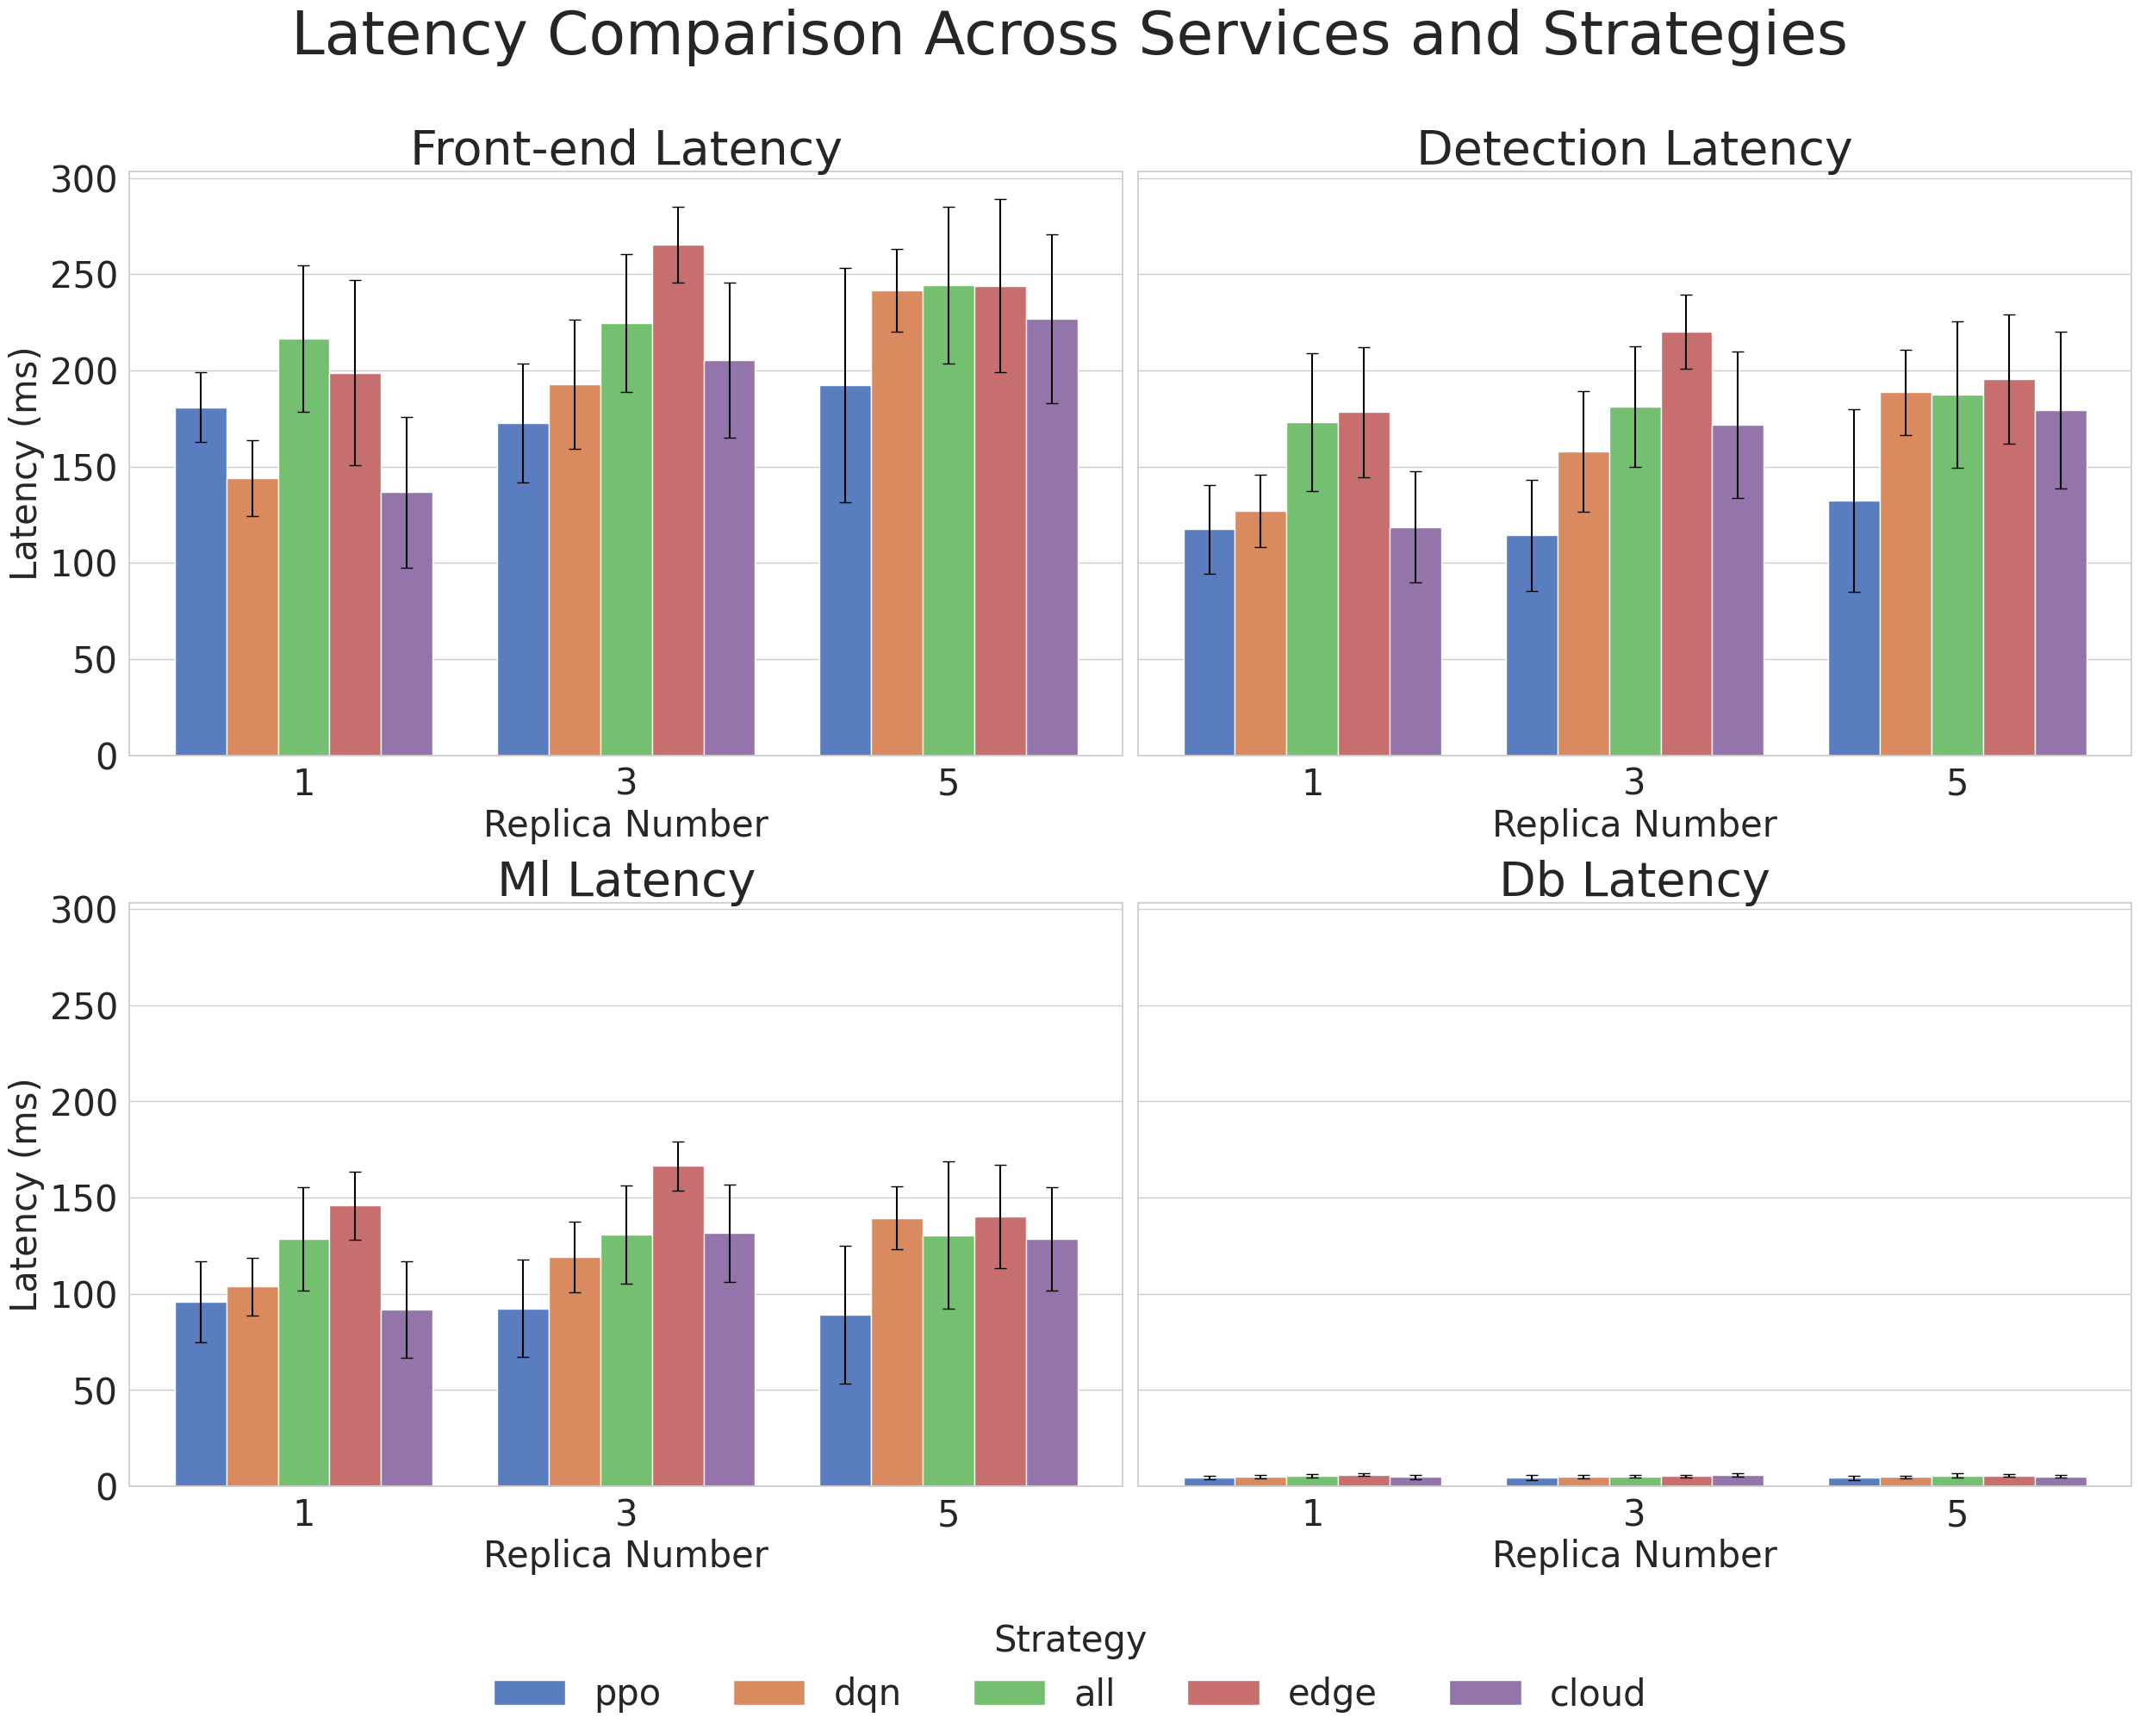

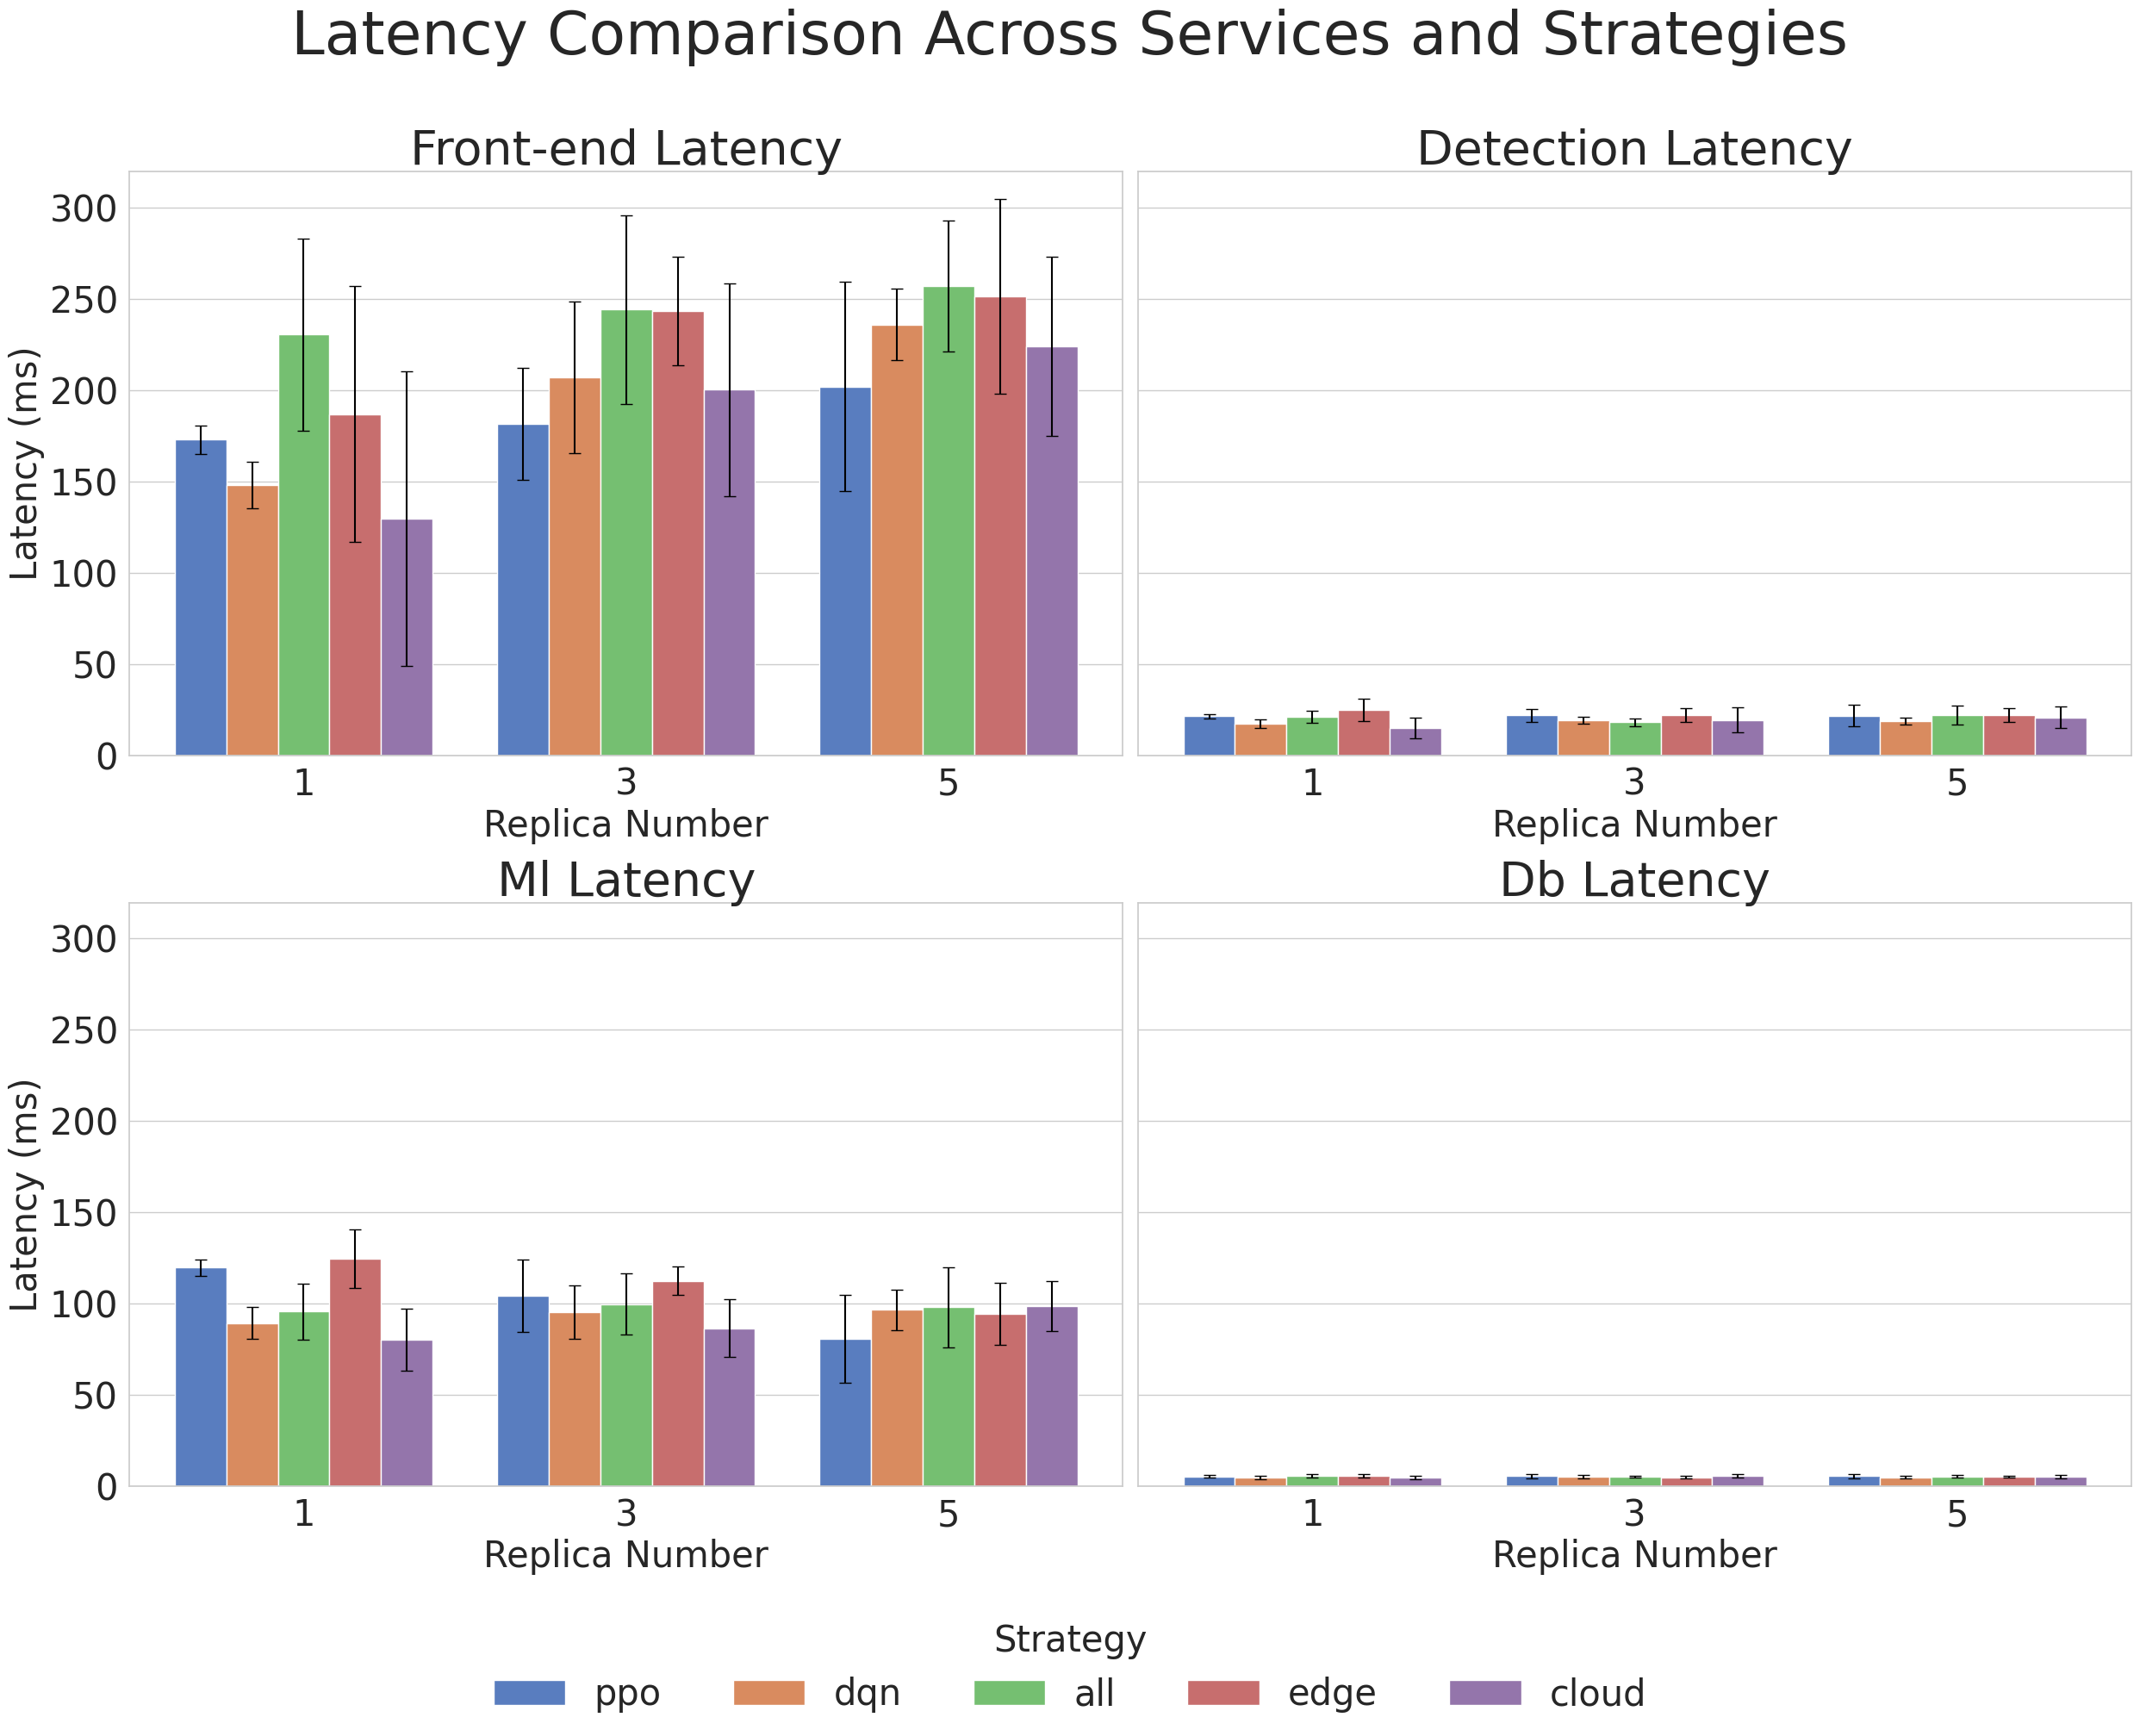

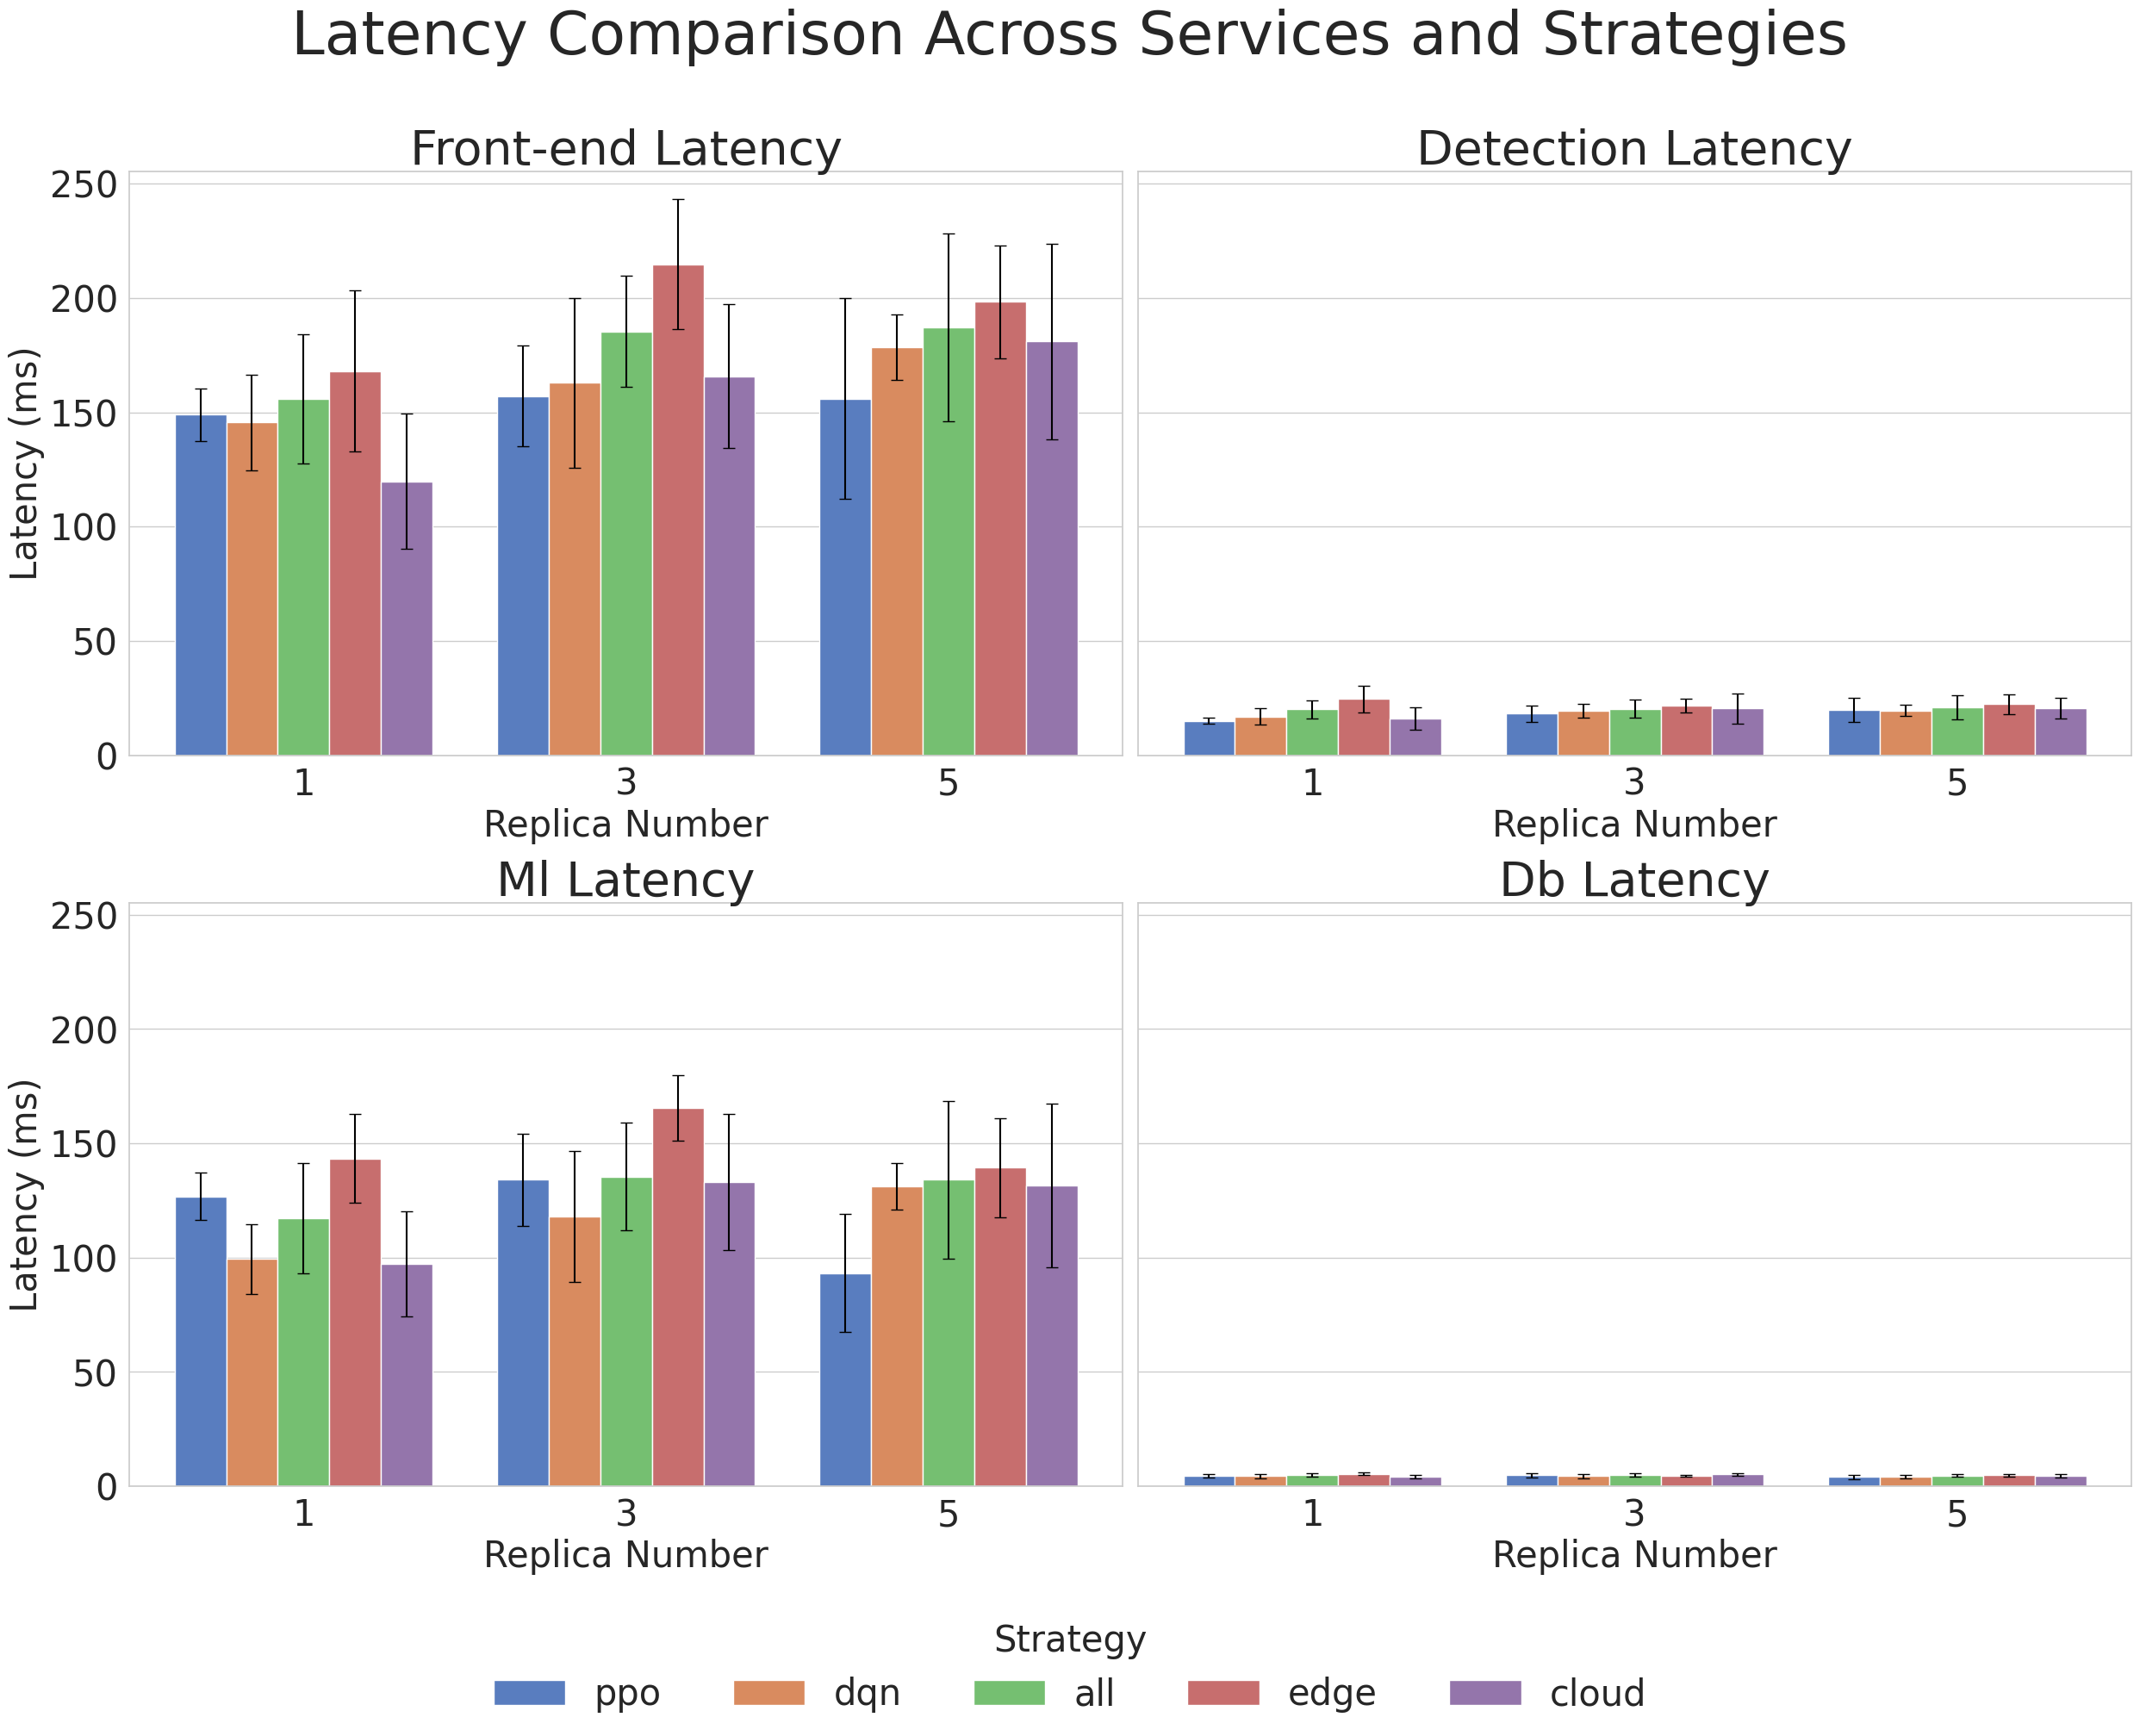

In [17]:
for pattern in ['chain', 'aggregator_sequential', 'aggregator_parallel']:
    compare_and_plot_latency(pattern, [1, 3, 5], f"./output/latency_comparison_{pattern}.png")